### Outliers   
Outliers are individuals that are very different from the majority of the population.  
Traditionally, there is a certain mistrust in outliers,  
this is why ad-hoc measures such as removing them from the dataset are often adopted.  

With real data, sometimes, they are even more important than other observations.  
High-paying customers: you don’t want to discard them, but want to treat them with extra care.  

Is an ML model more likely to make mistakes when making predictions on outliers?  

#### Causes  
1. Measurement errors  
2. Data processing errors   
3. Genuine extreme observations  

Understanding the source of an outlier is crucial for determining whether to keep, modify, or discard it.  
The impact of outliers on statistical analyses can be profound. They can change the results of data visualizations, central tendency measurements, and other statistical tests. Outliers can also influence the assumptions of normality, linearity, and homoscedasticity in a dataset, leading to unreliable and spurious conclusions.  

##### Detecting outliers.  

**Visual methods**: Plots and graphs, such as scatter plots, box plots, and histograms, provide an intuitive feel of the data distribution and any extreme values.   
**Statistical methods**: Techniques like the Z-score, IQR (Interquartile Range), and the modified Z-score are mathematical methods used to define outliers based on data distribution.  
**Probabilistic and statistical models**: These leverage the probability distribution of data, such as the Gaussian distribution, to detect unlikely observations.  
The choice of method often depends on the nature of the dataset and the specific problem at hand.  

### BMI as a function of height and weight   
See /Ref/IAP Growth Charts 5 to 18 years.pdf   
[IAP and WHO Charts](https://iapindia.org/iap-growth-charts/)   
[Horlicks](https://www.horlicks.in/kids/horlicks/articles/indian-height-weight-chart-according-to-age.html) approximate height and weight tables 0 to 20 years.  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Correlations    
1. BMI is a function of Height and weight.    
2. Weight is a higher contributor for BMI.  

In [2]:
df_bsc = pd.read_excel('../Data/BSc22A_Student_Data.xlsx')
df_bsc['BMI'] = df_bsc.Weight_Kg/(df_bsc.Height_cm/100)**2
df_ = df_bsc[['Height_cm', 'Weight_Kg', 'BMI']].dropna()
df_.columns = ['Ht', 'Wt', 'BMI']
df_.head()

d:\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,Ht,Wt,BMI
0,164.0,50.0,18.590125
1,169.0,49.0,17.156262
2,174.0,59.0,19.487383
3,175.0,63.0,20.571429
4,185.0,50.0,14.609204


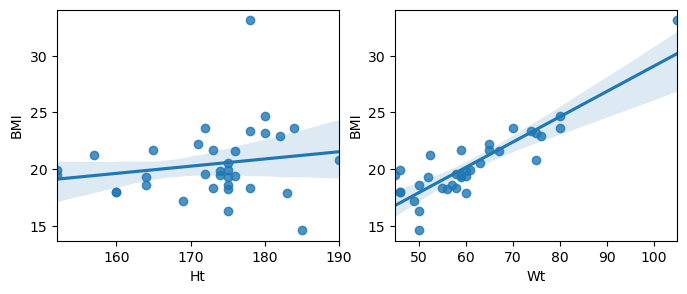

In [4]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.regplot(ax=ax[0], data=df_, x='Ht', y='BMI');
sns.regplot(ax=ax[1], data=df_, x='Wt', y='BMI');


##### Remove outlier   
Correlation changes when the outlier is removed from the sample dataset.   

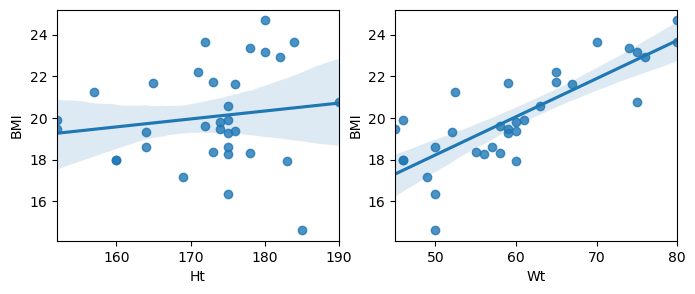

In [5]:
df__ = df_[df_.BMI < 30]
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.regplot(ax=ax[0], data=df__, x='Ht', y='BMI');
sns.regplot(ax=ax[1], data=df__, x='Wt', y='BMI');

In [6]:
df_.corr()

,Ht,Wt,BMI
Ht,1.000000,0.617690,0.178843
Wt,0.617690,1.000000,0.882878
BMI,0.178843,0.882878,1.000000


In [7]:
print(df__['Wt'].corr(df__['BMI']))
df__.corr()

0.8057381029139047


,Ht,Wt,BMI
Ht,1.000000,0.703188,0.149433
Wt,0.703188,1.000000,0.805738
BMI,0.149433,0.805738,1.000000


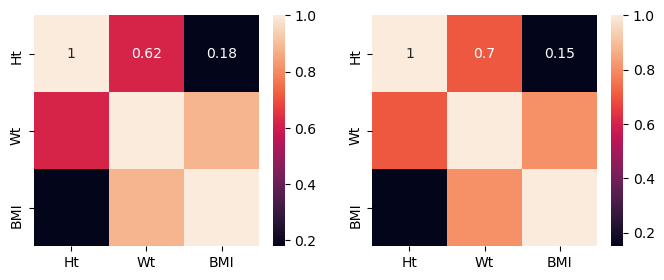

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.heatmap(df_.corr(), ax=ax[0], annot=True);
sns.heatmap(df__.corr(), ax=ax[1], annot=True);


### Ouliers   

#### Sample data of 2nd Sem students   
In Sem 4 sample, one student has significantly higher BMI but the value may be correct.   
In Sem 2 sample, there are wrong entries   
- one with a height of 17 cm. It could be 170 cm.  
- another a weight of 200 Kg.   

It is **necessary to** correct these entries or **drop** them. 

We should **thank these students** for teaching the effect of outliers.  

In [9]:
df2sem = pd.read_excel('../Data/Height_Weight_Sample.xlsx')
df2sem['BMI'] = df2sem.Weight_Kg/(df2sem.Height_cm/100)**2
df2sem = df2sem[['Height_cm', 'Weight_Kg', 'BMI']].dropna()
df2sem.columns = ['Ht', 'Wt', 'BMI']
df2sem.columns

Index(['Ht', 'Wt', 'BMI'], dtype='object')

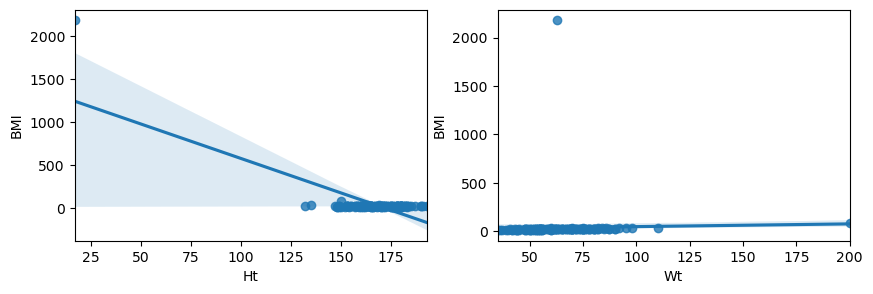

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.regplot(ax=ax[0], data=df2sem, x='Ht', y='BMI');
sns.regplot(ax=ax[1], data=df2sem, x='Wt', y='BMI');

#### Find outliers  
rows with the heaviest and then the shortest students   

In [11]:
print(df2sem.sort_values('Wt', ascending=False).head()); print();
print(df2sem.sort_values('Ht', ascending=True).head())


      Ht   Wt        BMI
69   150  200  88.888889
49   190  110  30.470914
72   178   98  30.930438
116  169   95  33.262141
87   176   92  29.700413

      Ht  Wt          BMI
113   17  63  2179.930796
92   132  41    23.530762
14   135  60    32.921811
56   147  55    25.452358
32   148  40    18.261505


In [12]:
df2sem_ = df2sem[df2sem.Wt < 111]
df2sem_ = df2sem_[df2sem_.Ht > 130]

print(df2sem_.sort_values('Wt', ascending=False).head()); print();
print(df2sem_.sort_values('Ht', ascending=True).head())

      Ht   Wt        BMI
49   190  110  30.470914
72   178   98  30.930438
116  169   95  33.262141
87   176   92  29.700413
5    178   90  28.405504

     Ht  Wt        BMI
92  132  41  23.530762
14  135  60  32.921811
56  147  55  25.452358
32  148  40  18.261505
46  148  37  16.891892


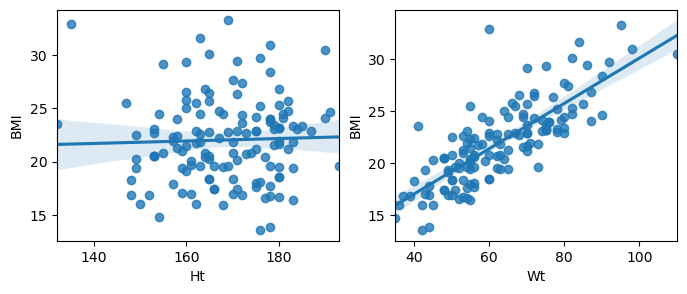

In [13]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.regplot(ax=ax[0], data=df2sem_, x='Ht', y='BMI');
sns.regplot(ax=ax[1], data=df2sem_, x='Wt', y='BMI');

In [14]:
print("Wt to BMI Correlation")
print('With Outlier:   ', df2sem['Wt'].corr(df2sem['BMI']))
print('Without Outlier:', df2sem_['Wt'].corr(df2sem_['BMI']))

print("\nHt to BMI Correlation")
print('With Outlier:   ', df2sem['Ht'].corr(df2sem['BMI']))
print('Without Outlier: ', df2sem_['Ht'].corr(df2sem_['BMI']))

Wt to BMI Correlation
With Outlier:    0.028338719160667374
Without Outlier: 0.794312687355545

Ht to BMI Correlation
With Outlier:    -0.7499295025154932
Without Outlier:  0.033482335431243807


#### Non-linear relationship   
Pluma Indian data covers ages 0 to 88.   
Weight and height of children do not correlate similar to those of adults.   
For children, they both are negatively correlated with BMI.  
**A linear model will not fit well for this dataset**.  


In [15]:
xls = pd.ExcelFile('../Data/Seven Schools.xlsx') 
xls.sheet_names
df = xls.parse('Puma_Indian')
df.Age = df.Age.astype('int')
df.head()

,Height_cm,Weight_Kg,Age,male,Sex,BMI
0,53.9750,4.252425,0,0,F,14.596588
1,55.8800,4.847765,0,0,F,15.524897
2,56.5150,5.159609,0,0,F,16.154344
3,59.6138,5.896696,1,0,F,16.592626
4,60.4520,5.669900,1,1,M,15.515081


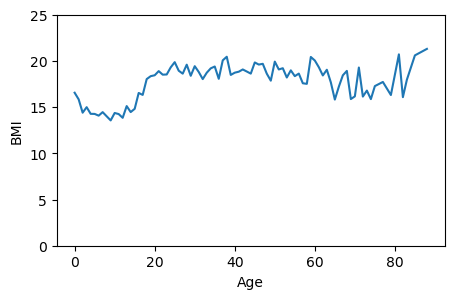

In [18]:
fig, ax = plt.subplots(figsize=(5, 3))
df.groupby('Age').mean('BMI')['BMI'].plot(); #.bar();
plt.ylim(0, 25)
plt.ylabel('BMI');

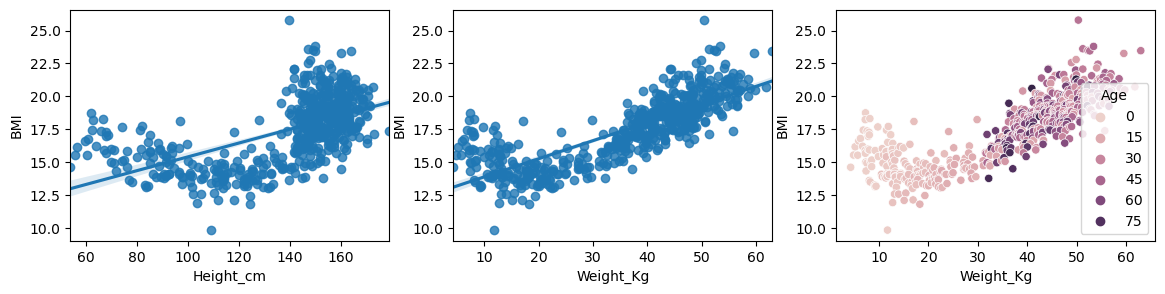

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))
sns.regplot(data=df, ax=ax[0], x="Height_cm", y="BMI");
sns.regplot(data=df, ax=ax[1], x="Weight_Kg", y="BMI");
sns.scatterplot(data=df, ax=ax[2], x="Weight_Kg", y="BMI", hue='Age');

#### Take subset of sample   
Because the training set used people above 18 years of age,  
take people older than 20 from the validation set.  

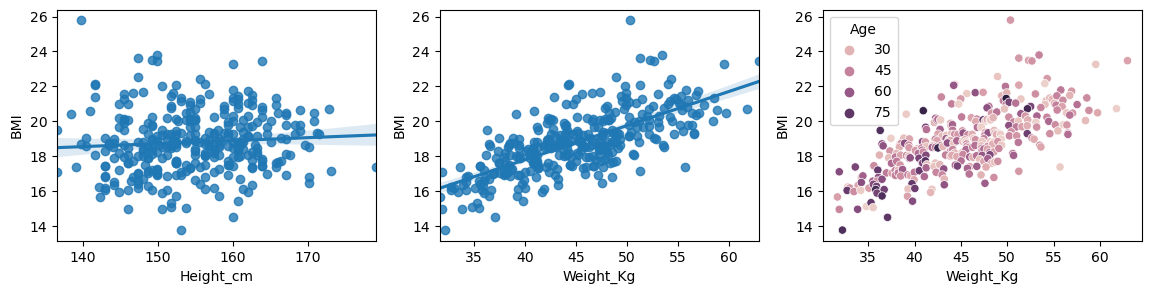

In [20]:
df_adlt = df[df.Age > 20]
fig, ax = plt.subplots(1, 3, figsize=(14,3))
sns.regplot(data=df_adlt, ax=ax[0], x="Height_cm", y="BMI");
sns.regplot(data=df_adlt, ax=ax[1], x="Weight_Kg", y="BMI");
sns.scatterplot(data=df_adlt, ax=ax[2], x="Weight_Kg", y="BMI", hue='Age');

#### Correlation alone can misguide   

In [21]:
print("Wt to BMI Correlation")
print('With Outlier:   ', df['Weight_Kg'].corr(df['BMI']))
print('Without Outlier:', df_adlt['Weight_Kg'].corr(df_adlt['BMI']))

print("\nHt to BMI Correlation")
print('With Outlier:   ', df['Height_cm'].corr(df['BMI']))
print('Without Outlier:', df_adlt['Height_cm'].corr(df_adlt['BMI']))

Wt to BMI Correlation
With Outlier:    0.800903509560273
Without Outlier: 0.7042064395134586

Ht to BMI Correlation
With Outlier:    0.573596359812178
Without Outlier: 0.07470841903357582


#### High dispersion reduces the accuracy    
High standard deviation   

In [22]:
df.agg(
    {
        "Height_cm": ["median", "skew", "std"],
        "Weight_Kg": ["median", "skew", "std"]
    }
)

,Height_cm,Weight_Kg
median,148.590000,40.057844
skew,-1.266725,-0.543362
std,27.602448,14.719178


In [23]:
df_adlt.agg(
    {
        "Height_cm": ["median", "skew", "std"],
        "Weight_Kg": ["median", "skew", "std"]
    }
)

,Height_cm,Weight_Kg
median,154.305000,45.075705
skew,0.137450,0.153810
std,7.799343,6.444848
